# Bases de l’inférence statistique (test d’hypothèse)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tips_df = sns.load_dataset("tips")
tips_df.shape

(244, 7)

## Derniers rappels sur l’EDA

Le but premier de l’EDA (*Exploratory Data Analysis*) est de se construire une bonne représentation et surtout compréhension des données en relevant des tendances et en détectant les anomalies. C’est la première étape indispensable de la création d’un modèle de *machine learning* ou de l’analyse de données. C’est à partir de là que vous formulerez les hypothèses (sur les relations entre variables) qui guideront votre travail et que vous allez tester.

Opérationnellement, il s’agit donc d’une part d’établir des statistiques de bases qui pourront nous aider à décrire les données et les tendances que l’on observe, de générer des *dataviz* pertinentes, et d’autre part de préparer les données pour l’analyse à venir, notamment de les nettoyer (valeurs aberrantes, valeurs manquantes).

Une poignée de méthodes sont à connaître absolument car elle nous permettont de réaliser la majeure partie de ce travail à l’aide de la bibliothèque `pandas`, et des bibliothèques de dataviz `seaborn` et `plotly`. Après avoir acquis ainsi une première compréhension des données à l’aide de ces méthodes, vous pourrez achever finement l’EDA en créant des opérations sur mesure pour vos données.

* `df.info()` : la première méthode à appeler une fois que vous aurez chargé vos données sous la forme d’un DataFrame. Cette méthode vous permet d’un coup de disposer des informations suivantes :
  
    * la taille (*shape*) du tableau (lignes / colonnes)
    * le nom de chaque colonne (nom de variables *a priori*)
    * le nombre de valeurs non-nulles dans chaque colonne
    * le datatype des valeurs dans chaque colonne
    * la taille en mémoire du DataFrame 

In [4]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


* pour les données numériques/quantitatives : `df.describe()`. Cette méhode va vous fournir les statistiques descriptives de base (nombre, moyenne, écart-type, médiane, min, max, quartiles…) permettant de se représenter la distribution.

In [5]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


* Pour les variables catégorielles/qualitatives :  `df['colonne'].value_counts()`. Cette fonction permet de dénombrer rapidement le nombre d’élément dans chaque catégorie (qui sont alors énumérées par la même occasion). Cela remplace avantageusement le recours aux méthoddes `df.unique()̀` et `df.nunique()̀` 

In [6]:
tips_df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

### Dataviz

#### Basique

* `df.plot()`


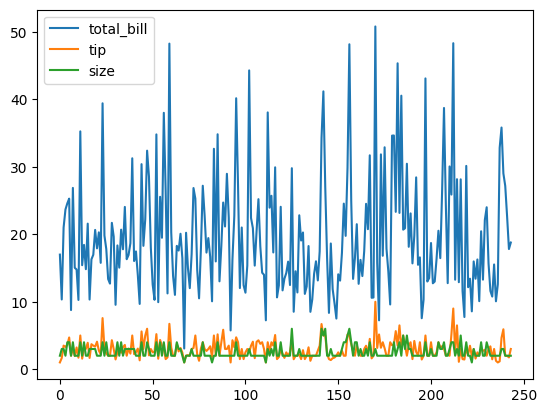

In [7]:
tips_df.plot();

* ̀`df['colonne'].hist(bins = nombre_de_barres)` permet d’avoir rapidement une idée de la distribution d’une variable quantitative.

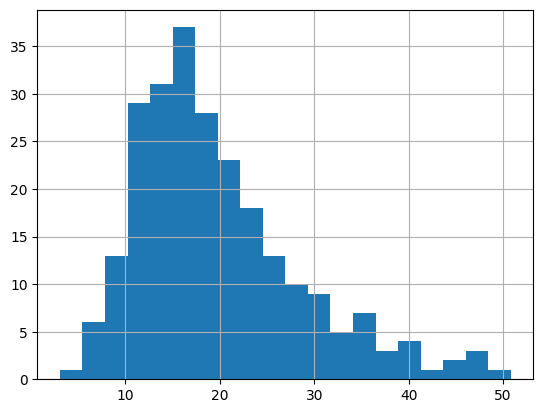

In [8]:
tips_df['total_bill'].hist(bins=20);

#### `seaborn`

* ̀`sns.histplot()` ermet de visualiser une distribution avec en prime l’option `kde` qui permet d’avoir une estimation de la courbe de densité

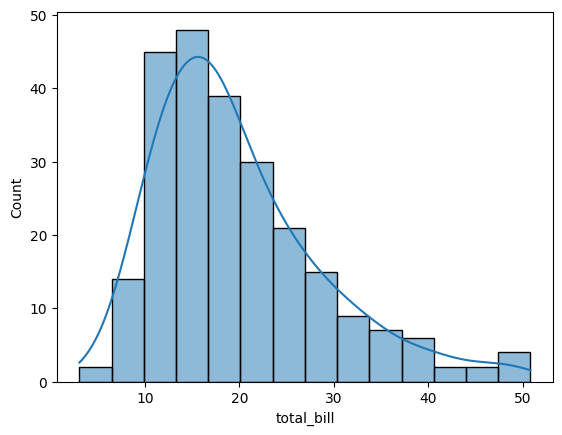

In [9]:
sns.histplot(tips_df['total_bill'], kde = True);

#### `plotly`

[plotly](https://plotly.com/python/) est une autre bibliothèque de dataviz qui met l’accent sur l’interactivité (elle forme avec Dash – basé sur Flask – un framework tout à fait adapté au dashboarding). Cette interactivité est intéressante pour l’exploration (possibilité de zoomer, etc.)
Son module `plotly.express` permet de créer des figures complexes en une seule ligne de code, selon un format standardisé :
`nom_de_la_fonction(dataframe,  x= ,  y= ,  title= ,  width= , height= )`, les dimensions étant données en pixel.

[Cheat sheet Plotly](https://media.datacamp.com/legacy/image/upload/v1668605954/Marketing/Blog/Plotly_Cheat_Sheet.pdf)

In [10]:
!pip install plotly

In [5]:
import plotly.express as px

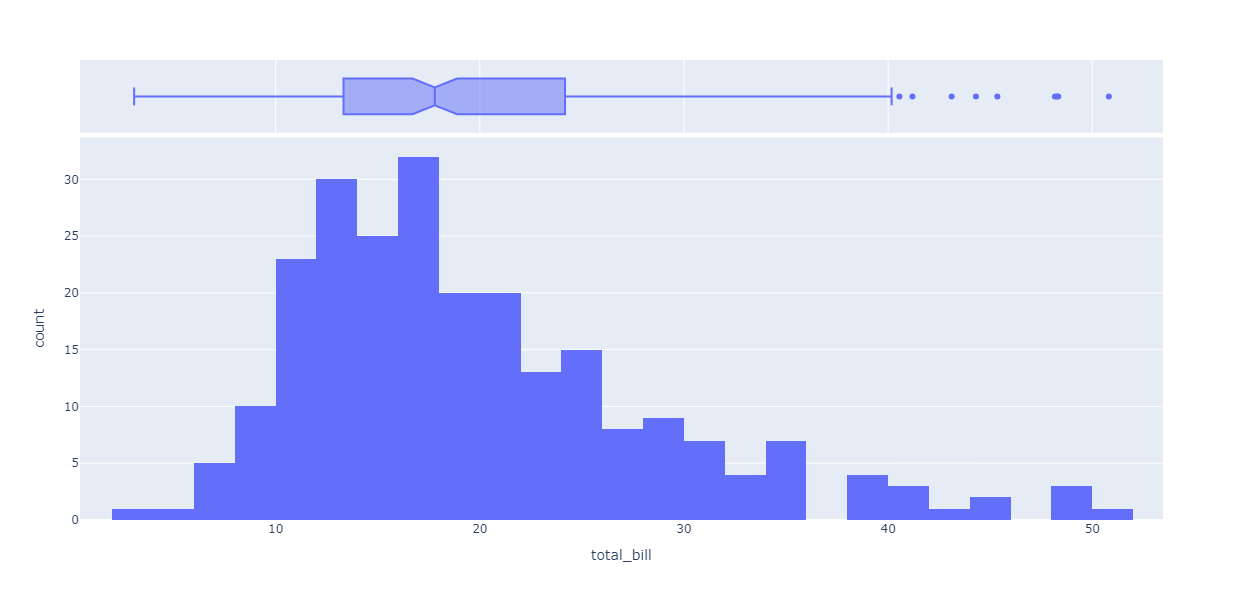

In [7]:
px.histogram(tips_df, x='total_bill', marginal='box', width=800, height=600)

In [8]:
from plotly import figure_factory as ff

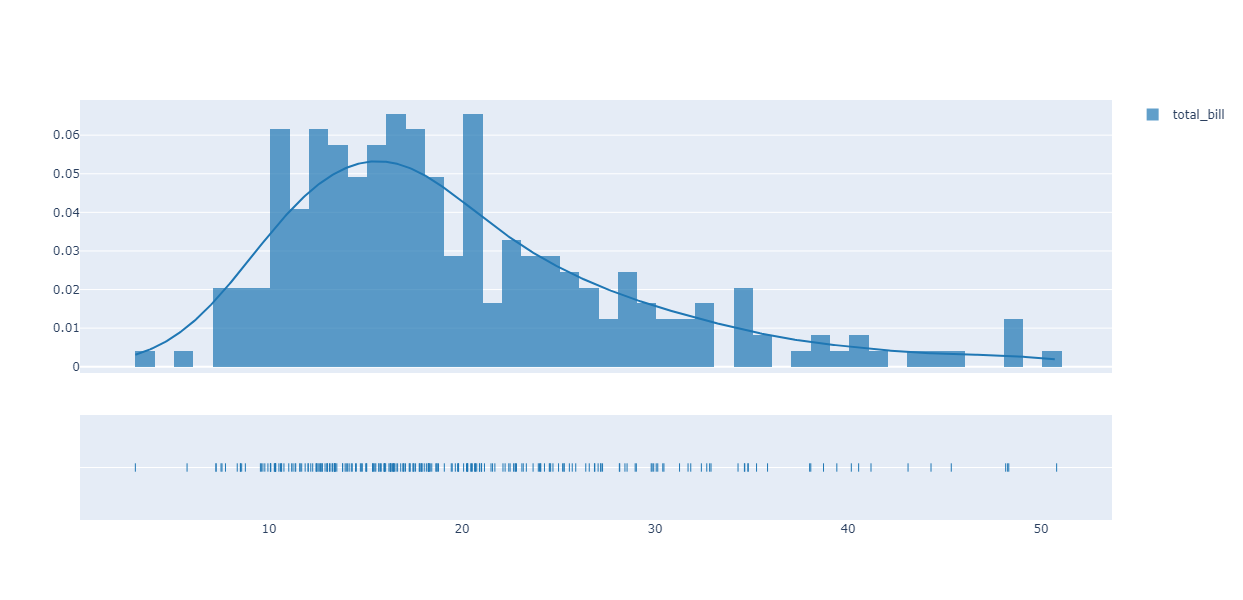

In [12]:
group_labels = ['total_bill']
fig = ff.create_distplot([tips_df.total_bill], group_labels)
fig.update_layout(width=800, height=600)

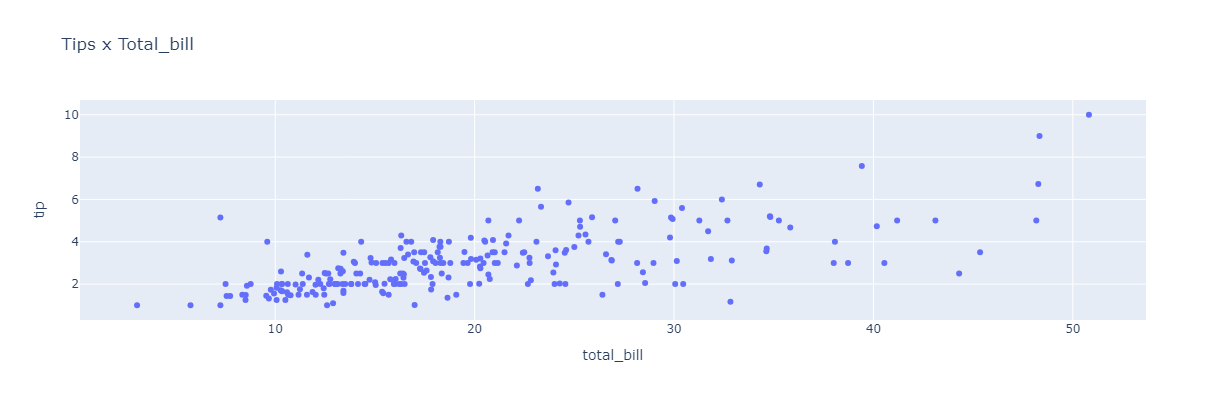

In [65]:
px.scatter(tips_df, 
           x='total_bill', 
           y='tip', 
           title='Tips x Total_bill', 
           width=600, 
           height=400)

### Valeurs manquantes et aberrantes (outliers)

* `df.count()` pour compter les valeurs non-manquantes (non NA) 

In [23]:
tips_df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

* `df.isnull()` ou `df.isna()` retournent un dataframe booléen où les valeurs `None` ou `np.NaN` sont à `True`. `df.notna()` fait l’opposé. Attention, les chaînes vides `''` ou des valeurs comme `np.inf` ne comptent pas comme des `NA` : il est important de bien inspecter les données pour voir comment identifier les valeurs manquantes (codes ? – chaînes ou valeurs numériques spécifiques, par exemple il n’est pas rare d’avoir des valeurs négatives là où elles ne devraient être que positives, chaînes vides ? etc.)

In [38]:
tips_na_df = tips_df.copy()
tips_na_df.iloc[tips_na_df.shape[0]-1,0] = np.nan # remplace par une valeur nulle
tips_na_df.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


* `df.dropna()` pour les éliminer. Sinon créer une fonction sur mesure pour remplacer par des valeurs (médiane, mode, etc.) en fonction de la situation  

In [40]:
tips_na_df.dropna(axis = 0) # attention à l’axe ! axis = 0 par défaut. Attention au inplace = True

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


* des fonctions pour récupérer les index des valeurs nulles (à modifier pour repérer des valeurs nulles autres que `None` ou `np.nan`) :

In [45]:
def get_na_index(df):
    return np.where(df.isna())

get_na_index(tips_na_df)

(array([243]), array([0]))

In [50]:
def get_na_values(df, idx):
    return [df.iloc[i,j] for i,j in zip(*idx)] # on utilise l’opérateur de déballage * pour « dézipper »

get_na_values(tips_na_df, get_na_index(tips_na_df))

[np.float64(nan)]

* note : voir [cette page](https://www.geeksforgeeks.org/zip-in-python/) si vous n’êtes pas à l’aise avec la fonction `zip()`

* `px.box()` avec `plotly` pour créer des boîtes à moustache où on peut lire facilement les valeurs :

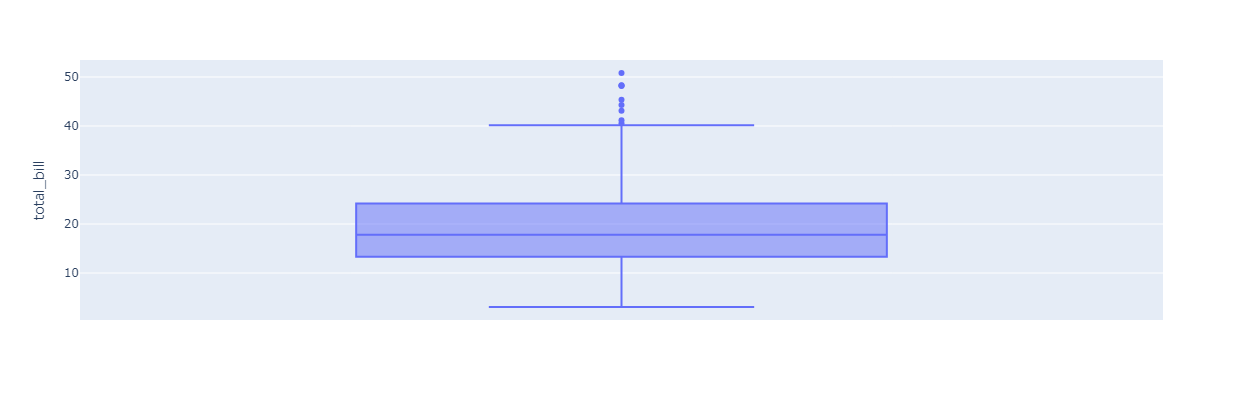

In [69]:
px.box(tips_df, y="total_bill", width=600, height=400)

* repérer les outliers à l’aide d’une fonction sur mesure (méthode des IQR, voir le récap de la séance 3 pour d’autres méthodes : écart-type, standardisation…)

In [55]:
# Répérer les outliers à partir des IQR
def IQR_outliers(df_col: pd.Series) -> tuple:
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    limite_sup = Q3 + 1.5 * IQR
    limite_inf = Q1 - 1.5 * IQR

    return (limite_inf, limite_sup)

IQR_outliers(tips_df.total_bill)

(np.float64(-2.8224999999999945), np.float64(40.29749999999999))

### Tendances

* `df.corr()` une table de corrélation nous permet déjà d’émettre des hypothèses sur des relations entre variables quantitatives

In [6]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
tips_df[['total_bill', 'tip', 'size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


* `sns.heatmap()` nous permet de visualiser plus facilement les corrélations plt.figure(figsize=(11,7))
sns.heatmap(orders.select_dtypes(exclude = ["object"]).corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 12})

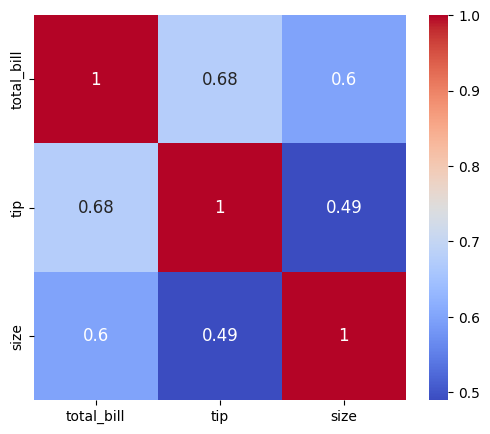

In [18]:
plt.figure(figsize=(6,5))
sns.heatmap(tips_df[['total_bill', 'tip', 'size']].corr(), 
            cmap='coolwarm', 
            annot = True, # affiche les valeurs dans les cellules
            annot_kws={"size": 12}); # taille des chiffres dans les cellulles

* `sns.pairplot()` vous permet de tracer des nuages de points en considérant des variables deux à deux (un peu comme un tableau de corrélation de la dataviz)

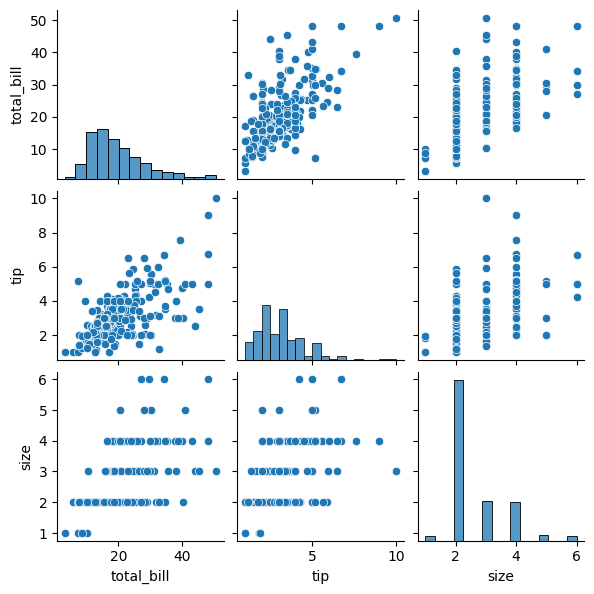

In [14]:
sns.pairplot(tips_df, height=2);

* lorsque l’on a repéré des relations intéressantes, on peut les observer plus en détail avec :
    * `sns.jointplot()` pour avoir une idée des distribution dans un nuage de point
    * `sns.regplot()` pour la relation entre variable quantitative et une estimation de la tendance (droite de regression)
    * `sns.countplot()` avec l’argument `hue=` pour mettre en relation des variables catégorielles
    * `sns.stripplot()` ou `sns.swarmplot()` pour mettre en relation des variables quantitatives et catégorielles, en améliorant la visibilité de la dispersion
    

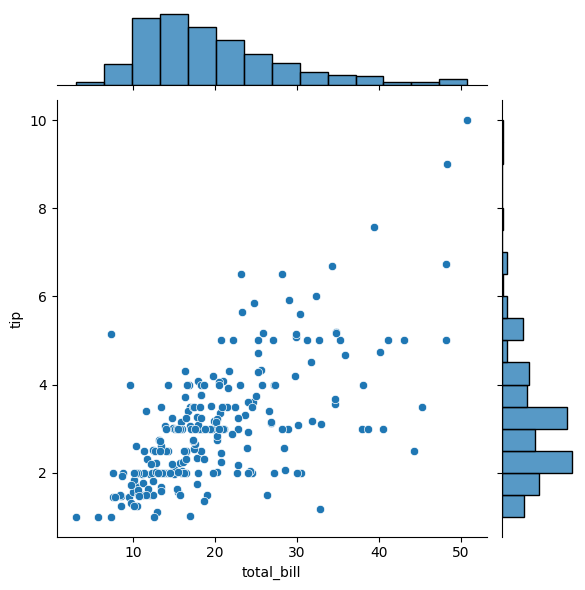

In [15]:
sns.jointplot(x='total_bill', y='tip', data=tips_df);

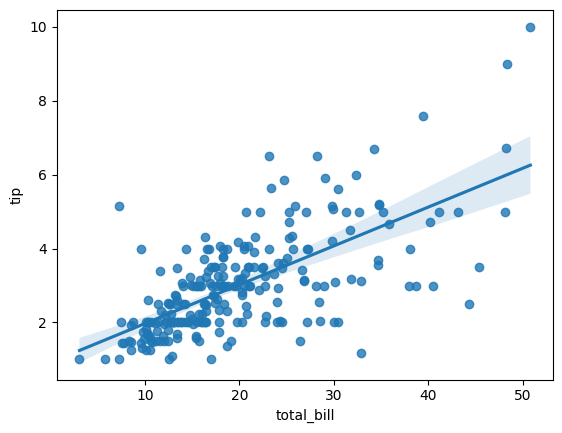

In [16]:
sns.regplot(x='total_bill', y='tip', data=tips_df);

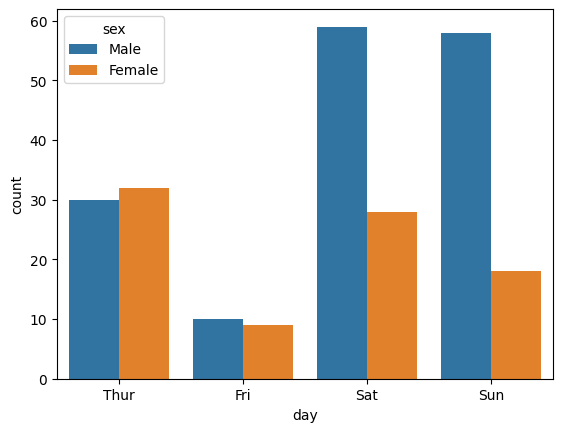

In [19]:
sns.countplot(x='day', data=tips_df, hue='sex');

<Axes: xlabel='time', ylabel='total_bill'>

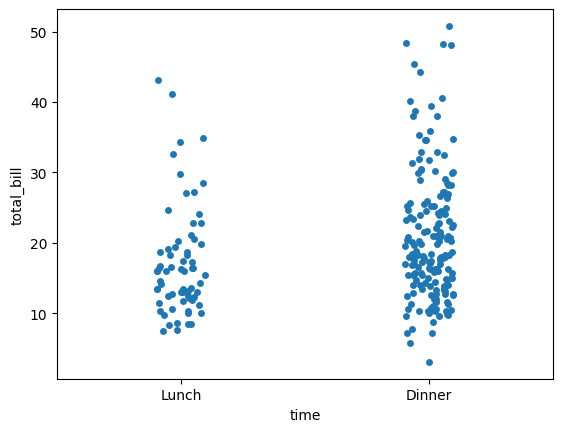

In [18]:
sns.stripplot(x='time', y='total_bill', data=tips_df)

* l’argument `trendline` dans un graphe de type `px.scatter()`, permet également d’afficher une tendance avec `plotly`, il faut alors indiquer le type d’estimation voulu. Par exemple, pour une régression un estimateur courant est `ols` (on verra cela en détail dans le cours sur la régression). Cette fonction nécessite la bibliothèque `statsmodels`. `plotly` permet alors d’afficher la valeurs des paramètres estimés et d’autres indicateurs.

In [71]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 1.9 MB/s eta 0:00:0000:0100:01
  Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


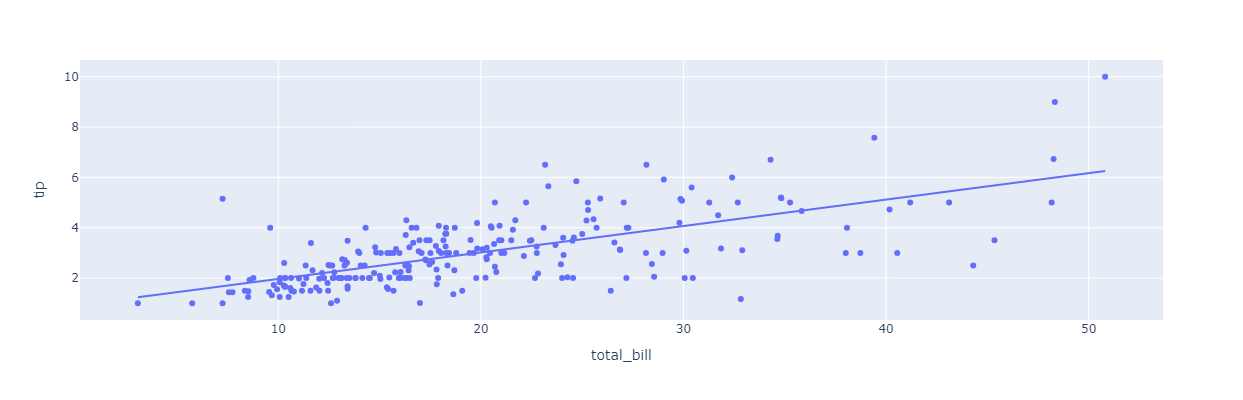

In [73]:
px.scatter(tips_df, x='total_bill',y='tip',trendline='ols', width=600, height=400)

### `ydata-profiling`

https://pypi.org/project/ydata-profiling/

* créer un rapport d’analyse exploratoire de dataframes, généré automatiquement
* exporter le rapport dans différents formats (HTML, JSON…)
* **Note : ydata est très chatouilleux sur les dépendances, je conseille fortement de mettre en place un environnemnet virtuel dédié, ou d’être très attentifs sur les versions des dépendances (déjà) installées**

Example : [EDA du fameux dataset « Titanic »](https://docs.profiling.ydata.ai/latest/examples/titanic/titanic_report.html)

In [1]:
#!deactivate
#!python3 -m venv ydata
#!source ydata/bin/activate
#!pip install ydata-profiling
from ydata_profiling import ProfileReport
!mkdir reports

/home/jean/.venv/ydata/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
profile = ProfileReport(tips_df, title = 'tips')
profile.to_file('reports/tips_report.html')

Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 620.37it/s]


## Echantillonnage

### Position du problème, échantillonnage

![Echantillonage illustration](./images/Echantillonnage.png)

Notre objectif va être d’inférer une règle générale (sur une population) à partir d’une observation limité (sur un échantillon). 

On ne pourra jamais savoir si on a raison ou pas, quelle est la « vérité » sur la population. Notre stratégie va être de chercher à déterminer :

* à quel point on commet une erreur en généralisant la règle

* quel risque on prend en généralisant, quelle est notre marge d’erreur

### Théorême central limite, loi des grands nombres

Considérons un ensemble de variables aléatoires indépendantes et uniformément distribuées. Par exemple : *n* tirages à pile ou face, ou *n* tirages d’un dé à 6 faces.

Considérons les sommes de ces tirages.

Par exemple, dans le cas où *n* = 6 :

* à pile (0) ou face (1) :

| Tirage 1      | Tirage 2      | Tirage 3      | Tirage 4      | Tirage 5      | Tirage 6      | Somme         |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| 0             | 1             | 0             | 1             | 0             | 1             | 3             |
| 1             | 0             | 0             | 1             | 1             | 1             | 4             |
| 1             | 0             | 1             | 1             | 1             | 0             | 4             |
| 1             | 0             | 0             | 0             | 1             | 1             | 3             |
| 1             | 0             | 1             | 0             | 1             | 0             | 3             |
| 1             | 0             | 1             | 1             | 0             | 1             | 4             |

* lancés de dés à 6 faces :

| Tirage 1      | Tirage 2      | Tirage 3      | Tirage 4      | Tirage 5      | Tirage 6      | Somme         |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| 6             | 3             | 4             | 5             | 4             | 3             | 25            |
| 3             | 4             | 4             | 5             | 3             | 5             | 24            |
| 3             | 2             | 1             | 1             | 5             | 2             | 14            |
| 1             | 6             | 2             | 2             | 3             | 1             | 15            |
| 5             | 6             | 1             | 6             | 1             | 2             | 21            |
| 3             | 4             | 5             | 1             | 4             | 1             | 18            |

Le théorème central limite nous dit que la distribution des sommes obtenues va tendre vers une distribution normale, avec l’augmentation du nombre de tirages. La moyenne observée sur des échantillons tirés au hasard va se distribuer selon une loi normale centrée sur la moyenne de la population au fur et à mesure que l’on augmente la taille des échantillons.

Considérons la suite suivante de 6 tirages à pile ou face dont on a caclulé les sommes :



In [50]:
pileface = [3, 4, 4, 3, 3, 4, 4, 4, 5, 4, 5, 5, 4, 2, 4, 3, 4, 4, 2, 3, 1, 4, 5, 3, 2, 2, 5, 2, 4, 4]
pd.DataFrame(data=pileface).describe()

,0
count,30.000000
mean,3.533333
std,1.074255
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


et pour les dés :

In [65]:

des6 = [25, 24, 14, 15, 21, 18, 18, 26, 19, 20, 
       23, 17, 16, 20, 14, 23, 24, 20, 26, 31, 
       27, 20, 15, 25, 22, 24, 25, 20, 19, 22, 
       26, 16, 27, 21, 22, 16, 21, 13, 18, 12,
       20, 23, 27, 22, 16, 14, 18, 16, 19, 20,
       30, 21, 24, 20, 23, 26, 22, 21, 22, 24,
       22, 23, 22, 17, 17, 17, 26, 25, 20, 20,
       28, 12, 15, 17, 18, 20, 22, 29, 19, 20,
       24, 18, 15, 20, 19, 24, 20, 17, 25, 15,
       23, 21, 27, 22, 19, 21, 20, 22, 16, 17,
       17, 17, 18, 25, 23, 20, 24, 20, 24, 18,
       27, 20, 23, 29, 22, 21, 24, 16, 26, 18,
       20, 27, 18, 13, 22, 24, 15, 33, 20, 15,
       20, 16, 23, 22, 25, 14, 24, 27, 26, 18,
       24, 24, 19, 20, 23, 24, 16, 20, 18, 12,
       19, 17, 30, 21, 28, 17, 22, 21, 19, 33,
       24, 19, 23, 19, 25, 20, 19, 17, 16, 20,
       21, 17, 26, 14, 32, 17, 25, 31, 22, 26,
       20, 18, 19, 16, 19, 23, 22, 24, 21, 23,
       15, 20, 27, 17, 20, 25, 14, 17, 28, 20]
len(des6)

200

In [66]:
pileface_data = [pileface[:10], pileface[:20], pileface]
des6_data = [des6[:10], des6[:50], des6]

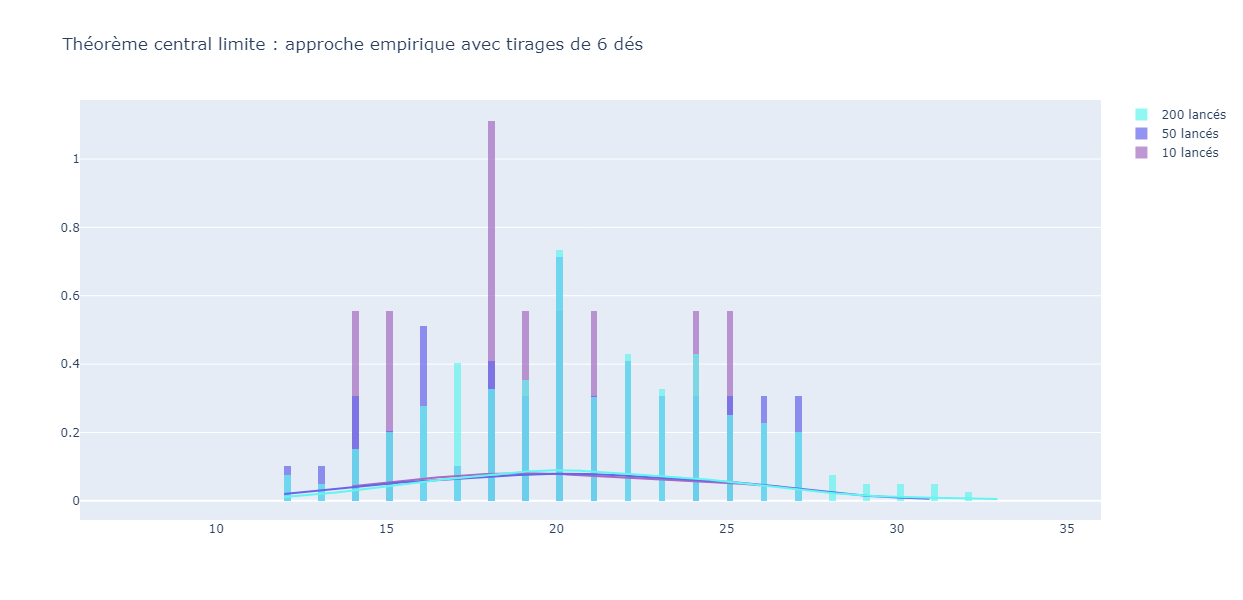

In [84]:
group_labels = ['10 lancers', '50 lancers', '200 lancers']
colors = ['#A56CC1', '#6666EC', '#63F5EF']

fig = ff.create_distplot(des6_data, group_labels, colors=colors,
                         bin_size=.2, show_rug=False)

# Mise en forme de la figure
fig.update_layout(title_text='Théorème central limite : approche empirique avec tirages de 6 dés', 
                  width=800, 
                  height=600)
fig.update_xaxes(range=[6, 36])
fig.show()

In [74]:
pd.DataFrame(data=des6).describe()

,0
count,200.000000
mean,20.945000
std,4.268851
min,12.000000
25%,18.000000
50%,20.000000
75%,24.000000
max,33.000000


In [30]:

des100 = [378, 327, 348, 324, 350, 372, 365, 358, 336, 343,
          341, 339, 365, 337, 351, 366, 304, 363, 367, 365,
          352, 339, 344, 333, 365, 348, 371, 352, 336, 333,
          357, 380, 348, 357, 356, 347, 385, 343, 350, 348,
          337, 343, 362, 377, 342, 306, 363, 363, 356, 336,
          314, 375, 342, 327, 343, 343, 349, 351, 357, 337,
          358, 324, 369, 328, 359, 373, 358, 365, 367, 333,
          384, 370, 349, 327, 330, 367, 379, 371, 345, 366,
          315, 377, 365, 348, 367, 301, 338, 320, 365, 355,
          358, 331, 352, 367, 353, 346, 376, 342, 342, 345,
          347, 365, 345, 335, 361, 364, 360, 366, 328, 356,
          387, 329, 338, 357, 312, 326, 361, 296, 343, 368,
          356, 359, 338, 358, 335, 366, 365, 351, 364, 369,
          344, 342, 342, 349, 370, 338, 350, 377, 362, 339,
          338, 355, 364, 374, 336, 362, 336, 351, 372, 365,
          361, 310, 334, 336, 364, 367, 358, 327, 358, 347,
          316, 356, 347, 345, 347, 371, 333, 346, 400, 365,
          335, 340, 374, 353, 340, 345, 367, 357, 362, 348,
          336, 335, 336, 333, 334, 379, 324, 359, 370, 323,
          356, 356, 337, 338, 338, 361, 319, 333, 340, 359,
          360, 356, 340, 330, 370, 351, 365, 322, 363, 357,
          358, 357, 371, 348, 322, 355, 337, 373, 332, 335,
          368, 340, 346, 361, 347, 354, 344, 358, 350, 349,
          387, 367, 322, 336, 349, 346, 359, 327, 343, 364,
          335, 321, 344, 330, 329, 378, 322, 359, 359, 348,
          376, 362, 358, 338, 344, 380, 356, 359, 361, 360,
          364, 367, 333, 357, 336, 321, 353, 343, 334, 354,
          364, 332, 363, 342, 359, 348, 364, 338, 349, 354,
          345, 346, 350, 335, 339, 356, 353, 352, 332, 315,
          344, 349, 334, 341, 355, 345, 349, 337, 349, 327]
len(des100)

300

In [31]:
des100_data = [des100[:10], des100[:50], des100[:100], des100]

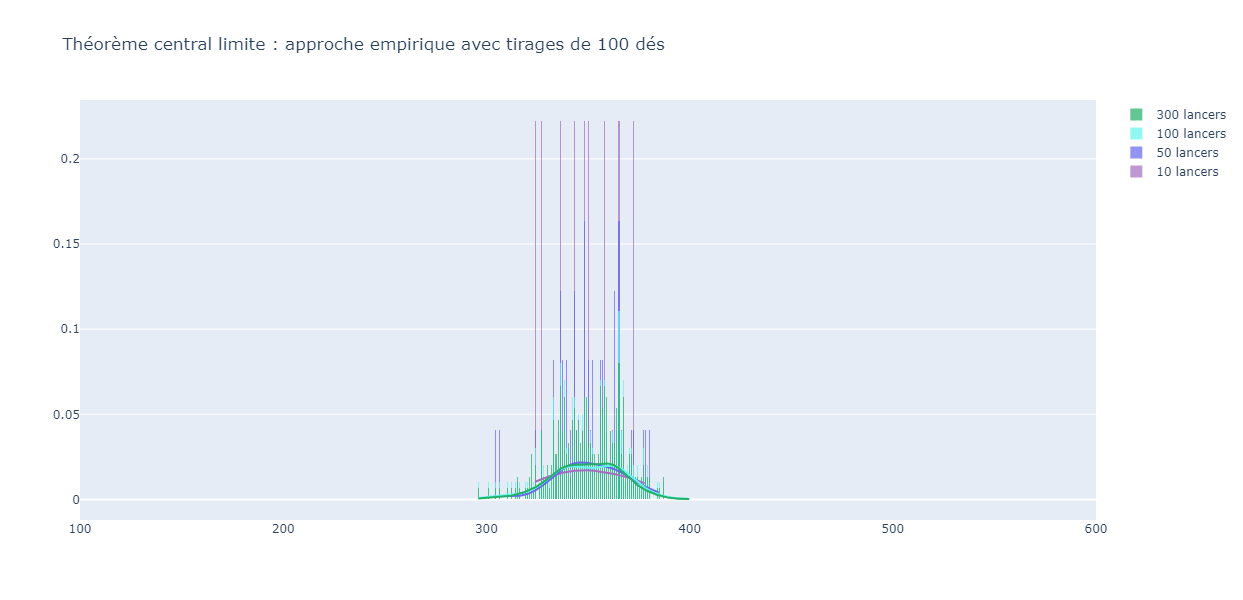

In [34]:
group_labels = ['10 lancers', '50 lancers', '100 lancers', '300 lancers']
colors = ['#A56CC1', '#6666EC', '#63F5EF', '#22AF66']

fig = ff.create_distplot(des100_data, group_labels, colors=colors,
                         bin_size=.5, show_rug=False)

# Add title
fig.update_layout(title_text='Théorème central limite : approche empirique avec tirages de 100 dés', 
                  width=800, 
                  height=600)

fig.update_xaxes(range=[100, 600])
fig.show()

In [35]:
pd.DataFrame(data=des100).describe()

,0
count,300.000000
mean,349.543333
std,16.743634
min,296.000000
25%,338.000000
50%,349.000000
75%,362.000000
max,400.000000


Le théorème de la limite centrale s’applique pour tout type de distribution de probabilité. Nous l’avons présenté pour des événements obéissants à des lois uniformes (lancers de pièce de monnaie ou de dés à 6 faces), mais il est valable également pour des distributions bimodales :

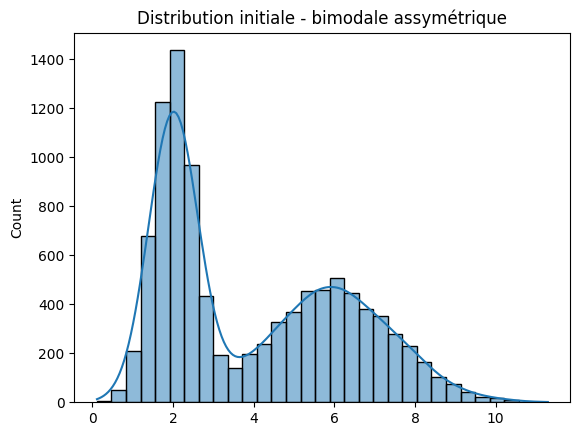

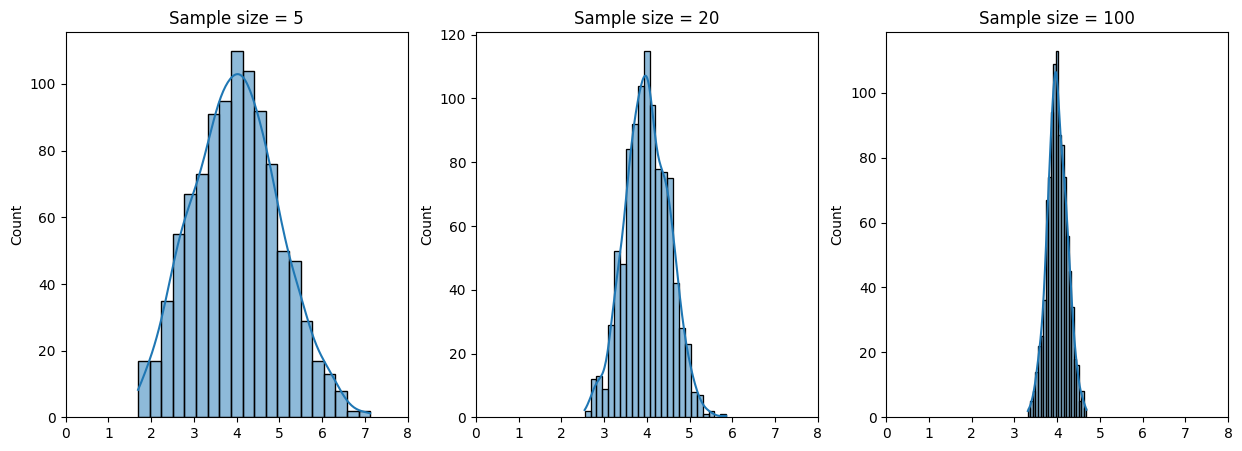

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Générer une distribution bimodale asymétrique
np.random.seed(42)
data1 = np.random.normal(loc=2, scale=0.5, size=5000)
data2 = np.random.normal(loc=6, scale=1.5, size=5000)
data = np.concatenate([data1, data2])

# Histogrammes distribution initiale
sns.histplot(data, kde = True).set_title('Distribution initiale - bimodale assymétrique');

# Tirer un échantillon et calculer la moyenne
def sample_means(data, sample_size, num_samples):
    means = [np.mean(np.random.choice(data, size=sample_size)) for _ in range(num_samples)]
    return means

# Taille des échantillons à tester
sample_sizes = [5, 20, 100]
num_samples = 1000

# Histogrammes des moyennes des échantillons
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, sample_size in enumerate(sample_sizes):
    means = sample_means(data, sample_size, num_samples)
    g = sns.histplot(ax=axes[i], data=means, kde=True)
    g.set_title(f'Sample size = {sample_size}')
    g.set_xlim(left=0, right=8)

In [28]:
pd.DataFrame(data).describe()

,0
count,10000.000000
mean,3.993995
std,2.288635
min,0.116400
25%,2.000773
50%,2.997612
75%,5.973491
max,11.293583


In [89]:
from scipy.stats import expon

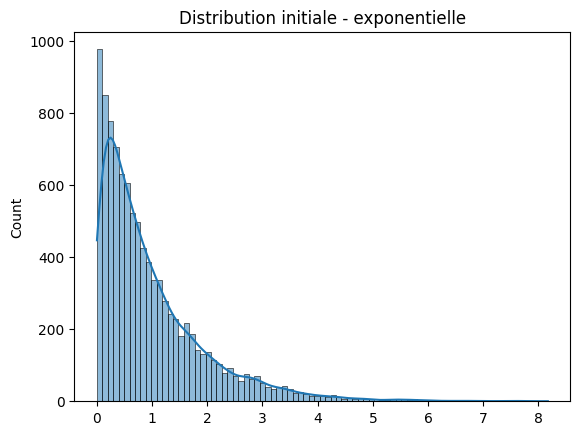

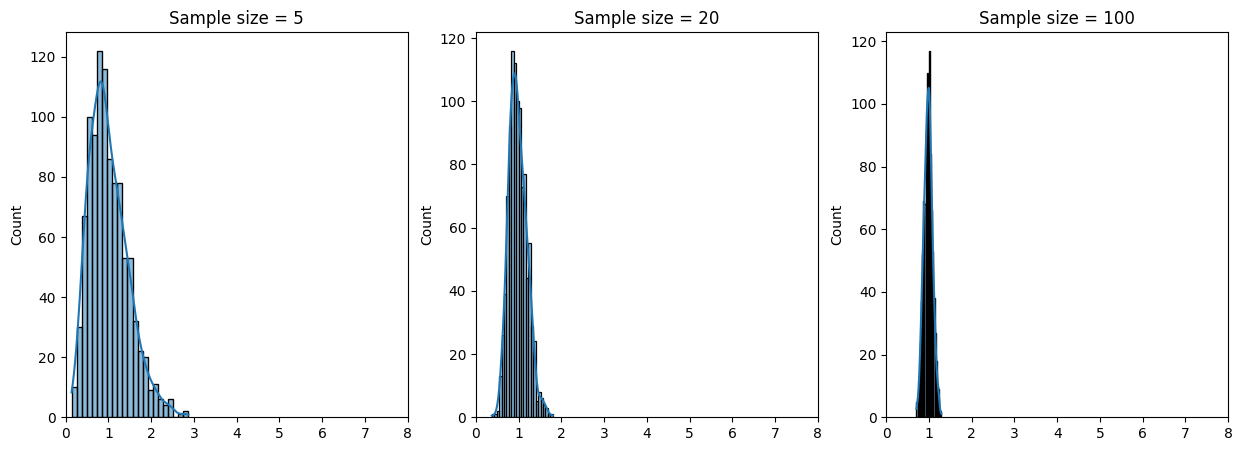

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Générer une distribution exponentielle
np.random.seed(42)
data = expon.rvs(scale=1, size=10000)

# Histogrammes distribution initiale
sns.histplot(data, kde = True).set_title('Distribution initiale - exponentielle');

# Fonction pour tirer un échantillon et calculer la moyenne
def sample_means(data, sample_size, num_samples):
    means = [np.mean(np.random.choice(data, size=sample_size)) for _ in range(num_samples)]
    return means

# Taille des échantillons à tester
sample_sizes = [5, 20, 100]
num_samples = 1000

# Histogrammes des moyennes des échantillons
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, sample_size in enumerate(sample_sizes):
    means = sample_means(data, sample_size, num_samples)
    g = sns.histplot(ax=axes[i], data=means, kde=True)
    g.set_title(f'Sample size = {sample_size}')
    g.set_xlim(left=0, right=8)

### TCL et échantillonage

* individus caractérisés par des observables (p. ex. : taille, poids, revenus, niveau d’étude…)
* population dans laquelle chaque observable a une moyenne **μ** et une dispersion (e.-t.) **σ**, selon une distribution (souvent normale, mais pas forcément)
* on tire de cette population des échantillons de taille n où l’observable a une moyenne **x̄** et une dispersion **s**
* ces moyennes calculées à partir des échantillons sont distribuées selon une distribution normale 
* plus la taille de l’échantillon est importante et plus :
    * **x̄** sera proche de **μ** (meilleur estimateur), et la moyenne **μ(x̄)** des moyennes sera également égale à *μ*
    * la distribution, de dispersion **σ(x̄)** sera ressérée autour de cette moyenne (limitée par la croissance de la fonction racine de n : la croissance de l’échantillon aura un effet limité au bout d’un moment – cf. les échantillons dans les sondages)

![TCL et échantillonage](./images/TCLetEchantillon.png)

### Intervalles de confiance

De tout ce qui a été vu précédemment, on peut tirer des conclusions en prenant le problème à l’envers : si je prends un échantillon unique de taille n tiré d’une population, quelle information sur la population puis-je en tirer ? et surtout, notre principal problème va être de déterminer à quel point on se trompe dans notre estimation des caractéristiques de la population à partir des observations sur l’échantillon. C’est le rôle des intervalles de confiance.

![Intervalle confiance et distribution](./images/IntervalleConfiance.png)

* Imaginons une population dont nous cherchons à déterminer la taille moyenne *µ*.
* Nous sélectionnons un échantillon de 1000 personnes, où nous mesurons une moyenne *x̄* de 180cm et 20cm d’écart-type *s* (dans l’échantillon).
* Nous savons donc que la moyenne que nous observons est tirée d’une distribution centrée sur *μ* et de dispersion : $$\frac{\sigma}{\sqrt{n}} \thickapprox \frac{s}{\sqrt{n}} = \frac{20}{\sqrt{1000}} = 0.63$$
* Or *x̄* est le meilleur estimateur (*maximum likelihood estimate* ou LME) de *μ*. Donc on *estime* que *μ* = 180cm. À quel point dit-on une bêtise en choisissant cette valeur ?
* Nous avons 67% de chance que d’être tombé à moins d’1 écart-type (de la distribution) *μ* avec notre échantillon. Nous avons avons 95% de chance d’être tombé à 2 écart-type de *μ*.
* Ainsi on peut écrire qu’avec un intervalle de confiance de 95%, *µ* = 180cm ± 0,63 x 2 = 180cm ± 1,26 = \[178,74 ; 181,26]
* Notes :
    * il faut que les tirages soient indépendants, idéalement il faudrait des tirages avec remise. Si l’échantillon est suffisamment petit par rapport à la taille de la population (en général < 10%), on peut considérer que la chance de tirer deux fois la même observation avec remise est si faible que ça ne fait pas de différence qu’il y ait eu remise ou pas
    * nous avons eu besoin de réaliser une approximation qui n’est valable que si *n* est assez grand, de même pour que le TCL soit valide. Empiriquement on considère que c’est le cas dès que *n* > 30
    * si *n* est plus petit que 30 (mais supérieur à 10) alors il faut vérifier qu’on n’a pas d’outlier et que l’on peut supposer que les distributions ne sont pas dissymétriques (*skewness*)
    * si on est sûr que l’obsevable est distribuée selon une loi normale, alors la taille *n* importe peu
    * la logique derrière ce raisonnement est centrée sur l’erreur et non la valeur réelle de la moyenne recherchée : à quel point j’ai « pas de bol » d’avoir sélectionné – au hasard – un échantillon composé d’observables qui étaient la plupart très éloignées de la valeur moyenne dans la population ? **À aucun moment un intervalle de confiance ne nous dit que la moyenne est de 180cm à 95%** par exemple.


#### Code pour déterminer les intervalles de confiance

Nous allons utiliser deux méthodes du module `stats` de la bibliothèque `scipy` : `.cdf()` (*cumulative distribution function*) ou fonction de répartition qui retourne la la probabilité qu'une variable aléatoire prenne une valeur inférieure ou égale à un réél donné (en argument). La fonction inverse, , est `.ppf`(*percent point function*) ou fonction quantile. Cette dernière nous permettra, pour un intervalle de confiance donné, de retrouver les valeurs (sup et inf) correspondantes dans la distribution, et la première nous indiquera quel intervalle correspond à des valeurs sup et inf données.

In [37]:
from scipy import stats

In [38]:
# Génération de la distribution d’échantillonage
distri_ech = stats.norm(180, 0.63)

In [40]:
intervalle_confiance = 0.95

# on détermine les limites sup et inf
proba_sup = 0.5 + intervalle_confiance/2
proba_inf = 0.5 - intervalle_confiance/2

mu_sup = distri_ech.ppf(proba_sup)
mu_inf = distri_ech.ppf(proba_inf)

print(f'Intervalle de confiance à {intervalle_confiance}% = [{mu_inf} ; {mu_sup}]')

Intervalle de confiance à 0.95% = [178.76522268973977 ; 181.23477731026023]


In [41]:
# on détermine l’intervalle de confiance
mu_inf = 178.74
mu_sup = 181.26
intervalle_confiance = distri_ech.cdf(mu_sup) - distri_ech.cdf(mu_inf)
print(f'L’intervalle de confiance de l’intervalle [{mu_inf} ; {mu_sup}] est {intervalle_confiance}%')

L’intervalle de confiance de l’intervalle [178.74 ; 181.26] est 0.95449973610364%


## Test d’hypothèse

### L’hypothèse nulle : un raisonnement par l’absurde

En général, on est intéressé de comparer des moyennes quand on compare des groupes ou des catégories différentes, par exemple la taille moyenne des hommes et celle des femmes.
Une utilisation notable est lors que l’on réalise des expériences (médicales, recherche, etc.) ou alors en marketing : on veut comparer l’effet d’une nouvelle caractéristique d’un produit sur le comportement ou le jugement de groupes de personnes différentes. On appelle cela les test A/B (où on compare un groupe A et un groupe B). Par exemple on veut savoir si un changement de conception dans un moteur limite son émission de CO2. On va avoir deux catégories : ancienne conception et nouvelle conception, et on veut savoir si les émissions moyennes de CO2 sont différentes entre les deux conceptions.

On va appliquer un raisonnement par l’absurde.

* Supposons qu’il n‘y a pas de différence entre les deux groupes. On fait l’hypothèse que le changement de conception n’a aucun effet. C’est ce que l’on appelle *l’hypohèse nulle*, noté **H0**
* Nous allons constituer deux groupes (*ancienne génération* et *nouvelle génération*), en choisissant (au hasard) des moteurs (n=100 par exemple) de chaque type au hasard parmi les moteurs produits dans les usines
* On mesure les émissions de CO2 ans chaque groupe. Supposons que *ancien* = 3000g CO2/heure avec une dispersion de 500 grammes et *nouveaux* = 2900kg CO2/heure. Les nouveaux semble moins émettre, mais cela est-t-il statistiquement *significatif* ?
* La logique va être de se demander : si les groupes ne sont pas différents, quelle est la probabilité que j’observe, en sélectionnant au hasard, des moteurs qui délivrent 2,8kg ou moins ? Si cette probabilité est inférieure à un certain seuil, que je vais fixer d’avance, alors je vais considérer que cette probabilité est trop faible pour que mon hypothèse H0 soit valide : je vais la rejeter (ce qui est différent de dire qu’elle est vraie). Dans le cas inverse, je ne vais pas pouvoir la rejeter. On ne saura jamais quelle est la réalité, aussi selon le choix que l’on fait, on peut commettre deux types d’erreurs différentes (cf. tableau ci-dessous)
* On appelle le seuil **α** et la probabilité d’observer une valeur en supposant H0, la **p-value**

|  Réalité       | H0 non-rejetée (p>α) | H0 rejetée (p<α) |
|----------------|----------------------|------------------|
| H0 est vraie   |          OK          | Erreur de type I |
| H0 est fausse  | Erreur de type II    |        OK        |

* Erreur de type I = faux positifs
* Erreur de type II = faux négatifs
* En décalant le seuil (plus ou moins de tolérance) on va augmenter tel ou tel type d’erreur : il va falloir arbitrer !

### Coder un test d’hypothèse

1. Créer la distribution d’échantillonage (méthode `norm()` dans `scipy.stats`) avec les paramètres du problème (moyenne, dispersion)
2. Calculer la *p-value* avec la méthode `.cdf()` pour la valeur moyenne testée (celle du groupe que l’on évalue). Attention, ce qui nous intéresse c’est la valeur au-delà du point
3. Comparer la valeur de *p* avec celle du seuil *α* qu’on s’est fixé a priori, et rejeter ou non l’hypothèse nulle

L’hypothèse H0 est rejetée avec p=0.022750131948179195 et α=0.05


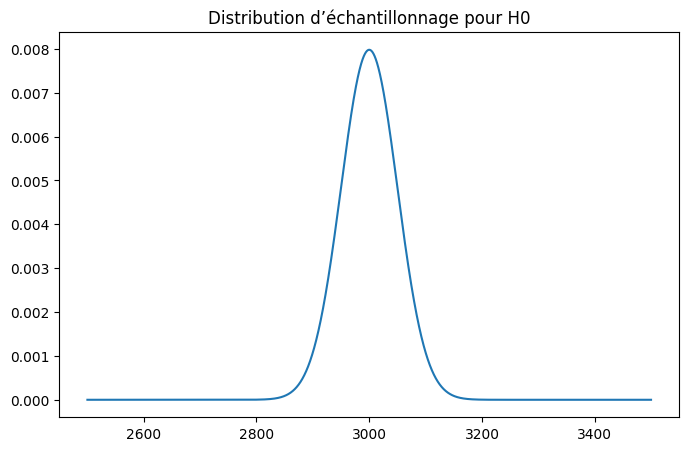

In [88]:
from scipy.stats import norm

alpha = 0.05
mean_tested = 2900
n = norm(3000, 500/(100**.5))

p = n.cdf(mean_tested)

if alpha/2 >= p:
    print(f'L’hypothèse H0 est rejetée avec p={p} et α={alpha}')
else:
    print(f'L’hypothèse H0 ne peut pas être rejetée avec p={p} et α={alpha}')

x = np.linspace(2500, 3500, 10000)
pdf = n.pdf(x)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, pdf)
ax.set_title("Distribution d’échantillonnage pour H0");
    

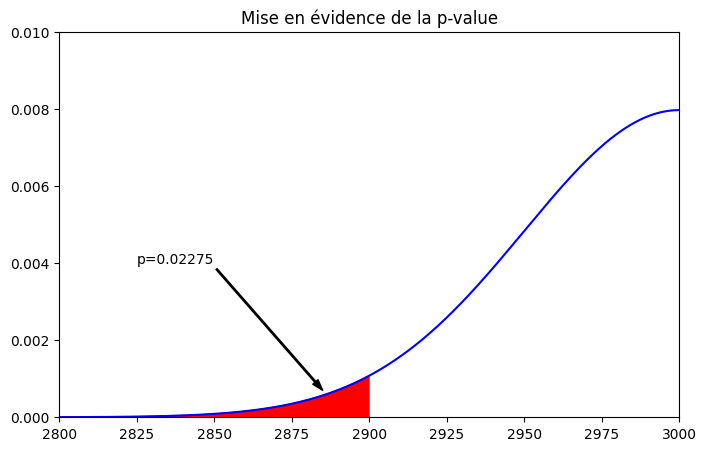

In [85]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Mise en évidence de la p-value");
ax.set_xlim(2800, 3000) # on se positionne sur le bon intervalle
ax.set_ylim(0, 0.01)
i = x <= mean_tested # boolean indexing pour colorer la zone qui nous intéresse
ax.fill_between(x[i], y1=0, y2=pdf[i], color='red') # on colore entre l’axe et la courbe pour les index sélectionnés précédemment
props = dict(facecolor='black', width=1, headwidth=5, headlength=8) # on définit les propriétés de la flèche
ax.annotate(f'p={round(p,5)}', (2885, 7e-4), (2825, 0.004), arrowprops=props) # on affiche p-value et flèche
ax.plot(x, pdf, color='blue');

Il est d’usage d’apposer des astérisques selon le niveau de significativité de la p-value pour faciliter la lecture : * pour p < 0,05 ; ** pour p < 0,01, *** pour p < 0,001 

### Exercice : 
1. Modifiez quelques paramètres (taille de l’échantillon, moyenne du groupe test, dispersion…) pour voir comment réagit le test
2. Il y a un bug dans ce code de test de H0. Saurez-vous le mettre en évidence et le corriger ?
3. Bonus : modifiez le code pour agrémenter la p-value d’astérisques selon le niveau de significativité 

### Le test-t et la distribution de Student

Dans ce que nous avons vu ci-dessus, beaucoup repose sur le fait que nous avons pu estimer la dispersion de la distribution d’échantillonage à partir de la dispersion dans l’échantillon observé. En effet, la formule : $$\frac{\sigma}{\sqrt{n}} \thickapprox \frac{s}{\sqrt{n}}$$ n’est valable que si *n* est assez grand.

On pourrait chercher à contourner le problème par une standardisation des moyennes, et dans ce cas on peut se contenter d’une loi normale centrée réduite, que l’on connaît bien. On peut la calculer ainsi pour la distribution d’échantillonage : $$\frac{\bar{X} - \mu}{\sigma / \sqrt{n}} = \frac{\bar{X} - \mu(\bar{X})}{s / \sqrt{n}}$$ Hélas cela ne fonctionne pas. En effet dans ce cas aussi on a besoin de pouvoir approcher *σ* à l’aide de *s*. Malheureusement cela n’est possible que si *n* est suffisamment grand, c’eset le même problème que tout à l’heure.

Le problème vient de ce que quand *n* est petit, on a de trop fortes chances d’obtenir des points éloignés de la tendance centrale, qui aurait alors trop de poids dans nos estimations par rapport à une loi normale. Pour résoudre le problème posé par les petits échantillons, Student (pseudonyme de [William Gosset](https://fr.wikipedia.org/wiki/William_Gosset)) a proposé une distribution dépendante de la taille de l’échantillon (elle a *n-1* degrés de liberté) :

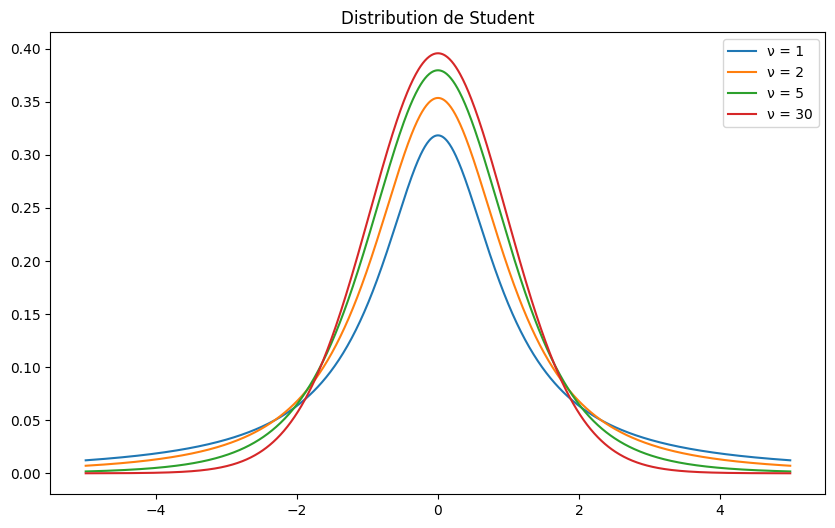

In [8]:
from scipy.stats import t

degres_liberte = [1, 2, 5, 30]

x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(10, 6))

for ddl in degres_liberte:
    y = t.pdf(x, ddl)
    g = sns.lineplot(x=x, y=y, label=f'ν = {ddl}')
    g.set_title('Distribution de Student')

Comparée à une distribution normale, elle en est très proche, avec une base d’autant plus épaisse (*skewness*) que les degrés de libertés sont petits, ce qui reflète la possibilité d’observer une dispersion plus importante pour les petits échantillons (on autorise plus d’évènements « extrêmes » dans les petits échantillons). Plus *n* augmente et plus elle tend vers une distribution normale.

### Exercice (2) :

1. Coder un test d’hypothèse avec la distribution de Student. Rappel : (1) créer la distribution avec les paramètres du problème, (2) calculer la p-value (3) conclure. Attention, rédiger une phrase de conclusion qui interprête correctement les résultats.
2. Rechercher dans la doc de scipy si des méthodes permettent de faire directement les différents types de tests, calculer les intervalles de confiance, etc.
3. Calculer des distributions d’échantillonages, des intervalles de confiance, et faire des comparaisons de moyennes (test) avec les données que vous avez sélectionnées et explorées pour aujourd’hui. Bien rédiger les interprétations.
